 # Dependencies


In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ledsacamcontrol import TimeSeries
import pandas as pd

ImportError: attempted relative import with no known parent package

# Config

In [8]:
rcParams['font.family'] = 'serif'

# Input Data

In [12]:
dataset_name = 'test_dataset'
ref_image = '/Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_172.CR2'
image_dir = '/Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/'
channel = 'all'
radius = 10
skip = 10
max_n_leds = 1000
percentile = 99.9
threshold_factor = 0.25
ignore_edge_leds = True

# Detect LEDs

Threshold pixel value: 503.0
Searching LEDs
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

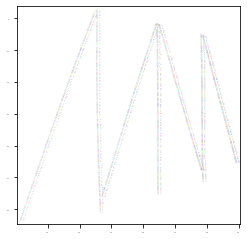

In [14]:
rcParams['font.size'] = 0.1
calib = TimeSeries(local_images=True)
# calib.find_leds_1(channel=channel, radius=radius, skip=skip,threshold_factor=threshold_factor, file=ref_image)
calib.find_leds_2(channel=channel, radius=radius, max_n_leds=max_n_leds, percentile=percentile, ignore_edge_leds=ignore_edge_leds, file=ref_image)
calib.plot_leds(dataset_name, crop_image=True)
rcParams['font.size'] = 10

# Check LEDs

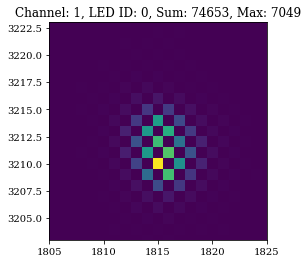

In [5]:
calib.plot_single_led(image=ref_image, led_id=0, channel=1)

# Set Time Series

In [7]:
calib.set_img_name_string(img_name_string='181127_v001_cam01_{:03d}.CR2', img_dir=image_dir)
limit = 9999
calib.set_images_series(127, 300, limit=limit, skip=10)

# Write Time Series to files

In [8]:
calib.write_channel_values_to_file(dataset_name)

Processing files
127 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_127.CR2
138 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_138.CR2
149 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_149.CR2
160 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_160.CR2
171 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_171.CR2
182 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_182.CR2
193 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_193.CR2
204 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_204.CR2
215 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_215.CR2
226 /Users/kristianboerger/working_files/ledsa/image_data/V001/Cam_01/181127_v001_cam01_226.CR2
237 /Users/kristianboer

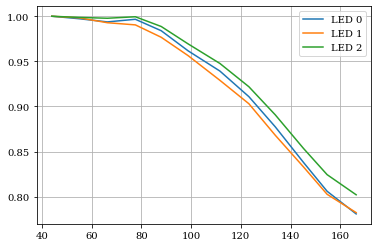

In [21]:
# Set window for moving average
window = 5
# Set camera channel
channel = 0
# Set LEDs to evaluate
led_list = [0, 1, 2]

# Load integral file
data_integral = pd.read_csv("integral_test_dataset.csv",header=[0,1], index_col=0)

data_integral.index = pd.to_datetime(data_integral.index)
time = (data_integral.index - data_integral.index[0]).total_seconds()

for i, led_id in enumerate(led_list):
    values = (data_integral[f'{channel}', f'{led_id}'] /  data_integral[f'{channel}', f'{led_id}'][0:5].mean()).rolling(window).mean()
    plt.plot(time, values, label=f"LED {i}")
plt.grid()
plt.legend()